# 1. Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from lightgbm import LGBMRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error

## 1.1 Data situation

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
tt_df = [train_df, test_df]

print(train_df.isna().sum())
print("*" * 50)
print(test_df.isna().sum())
print("*" * 50)
print(train_df.columns)
print("*" * 50)
print(train_df['country'].unique().tolist()) #虚拟编码
print(train_df['store'].unique().tolist()) #虚拟编码
print(train_df['product'].unique().tolist()) #虚拟编码

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64
**************************************************
id         0
date       0
country    0
store      0
product    0
dtype: int64
**************************************************
Index(['id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')
**************************************************
['Canada', 'Finland', 'Italy', 'Kenya', 'Norway', 'Singapore']
['Discount Stickers', 'Stickers for Less', 'Premium Sticker Mart']
['Holographic Goose', 'Kaggle', 'Kaggle Tiers', 'Kerneler', 'Kerneler Dark Mode']


## 1.2 fill na in num_sold

In [4]:
train_df = train_df.dropna()
df3 = train_df[['country','product','num_sold']].groupby(['country','product'], as_index=False).mean()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   30 non-null     object 
 1   product   30 non-null     object 
 2   num_sold  30 non-null     float64
dtypes: float64(1), object(2)
memory usage: 852.0+ bytes


In [5]:
df1 = train_df.dropna()

tt_df = [df1, test_df]

# 2. Description Analytics

## 2.1 Sales categorizing

In [6]:
df1[['country','product','num_sold']].groupby(['country', 'product'], as_index=False).mean()

country             product     num_sold
0      Canada   Holographic Goose   241.249270
1      Canada              Kaggle  1292.282753
2      Canada        Kaggle Tiers  1069.633034
3      Canada            Kerneler   583.854759
4      Canada  Kerneler Dark Mode   681.808500
5     Finland   Holographic Goose   177.405944
6     Finland              Kaggle  1270.898709
7     Finland        Kaggle Tiers  1048.214574
8     Finland            Kerneler   572.768609
9     Finland  Kerneler Dark Mode   671.928692
10      Italy   Holographic Goose   128.415852
11      Italy              Kaggle   920.549602
12      Italy        Kaggle Tiers   760.745535
13      Italy            Kerneler   415.487681
14      Italy  Kerneler Dark Mode   486.008343
15      Kenya   Holographic Goose     5.760129
16      Kenya              Kaggle    31.393169
17      Kenya        Kaggle Tiers    25.870291
18      Kenya            Kerneler    13.999737
19      Kenya  Kerneler Dark Mode    16.355802
20     Norway   Holographic Goose   337.579194
21     Norway              Kaggle  2414.199713
22     Norway        Kaggle Tiers  1994.730153
23     Norway            Kerneler  1089.705254
24     Norway  Kerneler Dark Mode  1276.587798
25  Singapore   Holographic Goose   204.719724
26  Singapore              Kaggle  1464.983575
27  Singapore        Kaggle Tiers  1210.871073
28  Singapore            Kerneler   661.207274
29  Singapore  Kerneler Dark Mode   773.480250

## 2.2 Converting date variables

In [7]:
for dataset in tt_df:
    dataset['date'] = pd.to_datetime(dataset['date'])
    dataset['Year'] = dataset['date'].dt.year
    dataset['quarter'] = dataset['date'].dt.quarter
    dataset['Month'] = dataset['date'].dt.month
    dataset['Day'] = dataset['date'].dt.day
    dataset['day_of_week'] = dataset['date'].dt.day_name()
    dataset['week_of_year'] = dataset['date'].dt.isocalendar().week
    
    dataset['day_sin'] = np.sin(2 * np.pi * dataset['Day'] / 365)
    dataset['day_cos'] = np.cos(2 * np.pi * dataset['Day'] / 365)
    dataset['month_sin'] = np.sin(2 * np.pi * dataset['Month'] / 12)
    dataset['month_cos'] = np.cos(2 * np.pi * dataset['Month'] / 12)
    dataset['year_sin'] = np.sin(2 * np.pi * dataset['Year'] / 7)
    dataset['year_cos'] = np.cos(2 * np.pi * dataset['Year'] / 7)

    dataset['Group'] = (dataset['Year'] - 2010) * 48 + dataset['Month'] * 4 + dataset['Day'] // 7

print(test_df)

           id       date    country                 store             product  \
0      230130 2017-01-01     Canada     Discount Stickers   Holographic Goose   
1      230131 2017-01-01     Canada     Discount Stickers              Kaggle   
2      230132 2017-01-01     Canada     Discount Stickers        Kaggle Tiers   
3      230133 2017-01-01     Canada     Discount Stickers            Kerneler   
4      230134 2017-01-01     Canada     Discount Stickers  Kerneler Dark Mode   
...       ...        ...        ...                   ...                 ...   
98545  328675 2019-12-31  Singapore  Premium Sticker Mart   Holographic Goose   
98546  328676 2019-12-31  Singapore  Premium Sticker Mart              Kaggle   
98547  328677 2019-12-31  Singapore  Premium Sticker Mart        Kaggle Tiers   
98548  328678 2019-12-31  Singapore  Premium Sticker Mart            Kerneler   
98549  328679 2019-12-31  Singapore  Premium Sticker Mart  Kerneler Dark Mode   

       Year  quarter  Month

In [8]:
df1.drop('date', axis=1, inplace=True)
test_df.drop('date', axis=1, inplace=True)
tt_df1 = [df1, test_df]

In [13]:
test_df

id    country                 store             product  Year  \
0      230130     Canada     Discount Stickers   Holographic Goose  2017   
1      230131     Canada     Discount Stickers              Kaggle  2017   
2      230132     Canada     Discount Stickers        Kaggle Tiers  2017   
3      230133     Canada     Discount Stickers            Kerneler  2017   
4      230134     Canada     Discount Stickers  Kerneler Dark Mode  2017   
...       ...        ...                   ...                 ...   ...   
98545  328675  Singapore  Premium Sticker Mart   Holographic Goose  2019   
98546  328676  Singapore  Premium Sticker Mart              Kaggle  2019   
98547  328677  Singapore  Premium Sticker Mart        Kaggle Tiers  2019   
98548  328678  Singapore  Premium Sticker Mart            Kerneler  2019   
98549  328679  Singapore  Premium Sticker Mart  Kerneler Dark Mode  2019   

       quarter  Month  Day day_of_week  week_of_year   day_sin   day_cos  \
0            1      1    1      Sunday            52  0.017213  0.999852   
1            1      1    1      Sunday            52  0.017213  0.999852   
2            1      1    1      Sunday            52  0.017213  0.999852   
3            1      1    1      Sunday            52  0.017213  0.999852   
4            1      1    1      Sunday            52  0.017213  0.999852   
...        ...    ...  ...         ...           ...       ...       ...   
98545        4     12   31     Tuesday             1  0.508671  0.860961   
98546        4     12   31     Tuesday             1  0.508671  0.860961   
98547        4     12   31     Tuesday             1  0.508671  0.860961   
98548        4     12   31     Tuesday             1  0.508671  0.860961   
98549        4     12   31     Tuesday             1  0.508671  0.860961   

          month_sin  month_cos  year_sin  year_cos  Group  
0      5.000000e-01   0.866025  0.781831  0.623490    340  
1      5.000000e-01   0.866025  0.781831  0.623490    340  
2      5.000000e-01   0.866025  0.781831  0.623490    340  
3      5.000000e-01   0.866025  0.781831  0.623490    340  
4      5.000000e-01   0.866025  0.781831  0.623490    340  
...             ...        ...       ...       ...    ...  
98545 -2.449294e-16   1.000000  0.433884 -0.900969    484  
98546 -2.449294e-16   1.000000  0.433884 -0.900969    484  
98547 -2.449294e-16   1.000000  0.433884 -0.900969    484  
98548 -2.449294e-16   1.000000  0.433884 -0.900969    484  
98549 -2.449294e-16   1.000000  0.433884 -0.900969    484  

[98550 rows x 17 columns]

## 2.3 Logging num_sold

<Axes: >

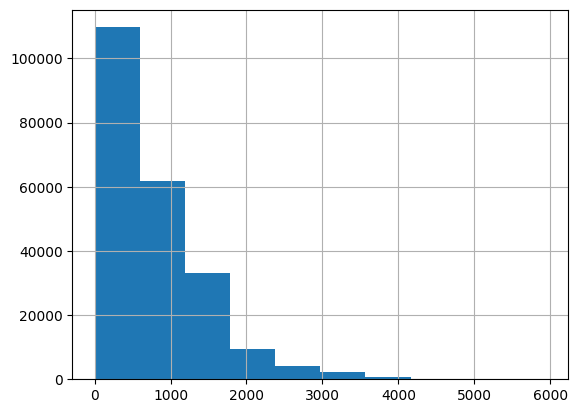

In [14]:
df1['num_sold'].hist()

<Axes: >

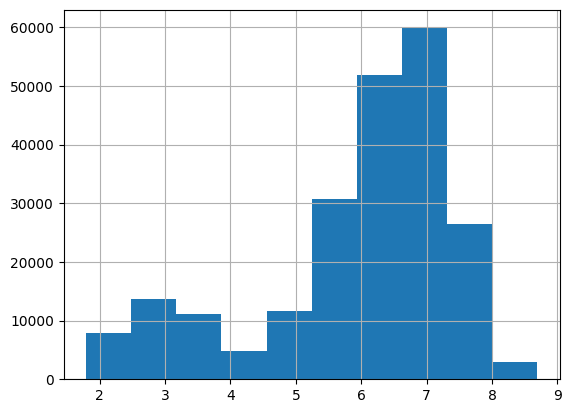

In [15]:
df1['num_sold'] = np.log1p(df1['num_sold'])
df1['num_sold'].hist()

## 2.4 Encoding

In [16]:
df1 = df1.drop('id', axis=1)
num_cols = list(df1.select_dtypes(exclude=['object']).columns.difference(['num_sold']))
cat_cols = list(df1.select_dtypes(include=['object']).columns)

num_cols_test = list(test_df.select_dtypes(exclude=['object']).columns.difference(['id']))
cat_cols_test = list(test_df.select_dtypes(include=['object']).columns)

In [17]:
Label_Encoder = {col: LabelEncoder() for col in cat_cols}

for col in cat_cols:
    df1[col] = Label_Encoder[col].fit_transform(df1[col])
    test_df[col] = Label_Encoder[col].transform(test_df[col])

In [18]:
df1.dropna(inplace=True)

In [19]:
df1.drop_duplicates()

country  store  product  num_sold  Year  quarter  Month  Day  \
1             0      0        1  6.881411  2010        1      1    1   
2             0      0        2  6.810142  2010        1      1    1   
3             0      0        3  6.049733  2010        1      1    1   
4             0      0        4  6.198479  2010        1      1    1   
5             0      2        0  5.707110  2010        1      1    1   
...         ...    ...      ...       ...   ...      ...    ...  ...   
230125        5      1        0  6.146329  2016        4     12   31   
230126        5      1        1  7.975221  2016        4     12   31   
230127        5      1        2  7.740664  2016        4     12   31   
230128        5      1        3  7.125283  2016        4     12   31   
230129        5      1        4  7.392032  2016        4     12   31   

        day_of_week  week_of_year   day_sin   day_cos     month_sin  \
1                 0            53  0.017213  0.999852  5.000000e-01   
2                 0            53  0.017213  0.999852  5.000000e-01   
3                 0            53  0.017213  0.999852  5.000000e-01   
4                 0            53  0.017213  0.999852  5.000000e-01   
5                 0            53  0.017213  0.999852  5.000000e-01   
...             ...           ...       ...       ...           ...   
230125            2            52  0.508671  0.860961 -2.449294e-16   
230126            2            52  0.508671  0.860961 -2.449294e-16   
230127            2            52  0.508671  0.860961 -2.449294e-16   
230128            2            52  0.508671  0.860961 -2.449294e-16   
230129            2            52  0.508671  0.860961 -2.449294e-16   

        month_cos      year_sin  year_cos  Group  
1        0.866025  7.818315e-01   0.62349      4  
2        0.866025  7.818315e-01   0.62349      4  
3        0.866025  7.818315e-01   0.62349      4  
4        0.866025  7.818315e-01   0.62349      4  
5        0.866025  7.818315e-01   0.62349      4  
...           ...           ...       ...    ...  
230125   1.000000 -7.053966e-14   1.00000    340  
230126   1.000000 -7.053966e-14   1.00000    340  
230127   1.000000 -7.053966e-14   1.00000    340  
230128   1.000000 -7.053966e-14   1.00000    340  
230129   1.000000 -7.053966e-14   1.00000    340  

[221259 rows x 17 columns]

In [102]:
test_df

id  country  store  product  Year  quarter  Month  Day  \
0      230130        0      0        0  2017        1      1    1   
1      230131        0      0        1  2017        1      1    1   
2      230132        0      0        2  2017        1      1    1   
3      230133        0      0        3  2017        1      1    1   
4      230134        0      0        4  2017        1      1    1   
...       ...      ...    ...      ...   ...      ...    ...  ...   
98545  328675        5      1        0  2019        4     12   31   
98546  328676        5      1        1  2019        4     12   31   
98547  328677        5      1        2  2019        4     12   31   
98548  328678        5      1        3  2019        4     12   31   
98549  328679        5      1        4  2019        4     12   31   

       day_of_week  week_of_year   day_sin   day_cos     month_sin  month_cos  \
0                3            52  0.017213  0.999852  5.000000e-01   0.866025   
1                3            52  0.017213  0.999852  5.000000e-01   0.866025   
2                3            52  0.017213  0.999852  5.000000e-01   0.866025   
3                3            52  0.017213  0.999852  5.000000e-01   0.866025   
4                3            52  0.017213  0.999852  5.000000e-01   0.866025   
...            ...           ...       ...       ...           ...        ...   
98545            5             1  0.508671  0.860961 -2.449294e-16   1.000000   
98546            5             1  0.508671  0.860961 -2.449294e-16   1.000000   
98547            5             1  0.508671  0.860961 -2.449294e-16   1.000000   
98548            5             1  0.508671  0.860961 -2.449294e-16   1.000000   
98549            5             1  0.508671  0.860961 -2.449294e-16   1.000000   

       year_sin  year_cos  Group  
0      0.781831  0.623490    340  
1      0.781831  0.623490    340  
2      0.781831  0.623490    340  
3      0.781831  0.623490    340  
4      0.781831  0.623490    340  
...         ...       ...    ...  
98545  0.433884 -0.900969    484  
98546  0.433884 -0.900969    484  
98547  0.433884 -0.900969    484  
98548  0.433884 -0.900969    484  
98549  0.433884 -0.900969    484  

[98550 rows x 17 columns]

In [20]:
df1.shape

(221259, 17)

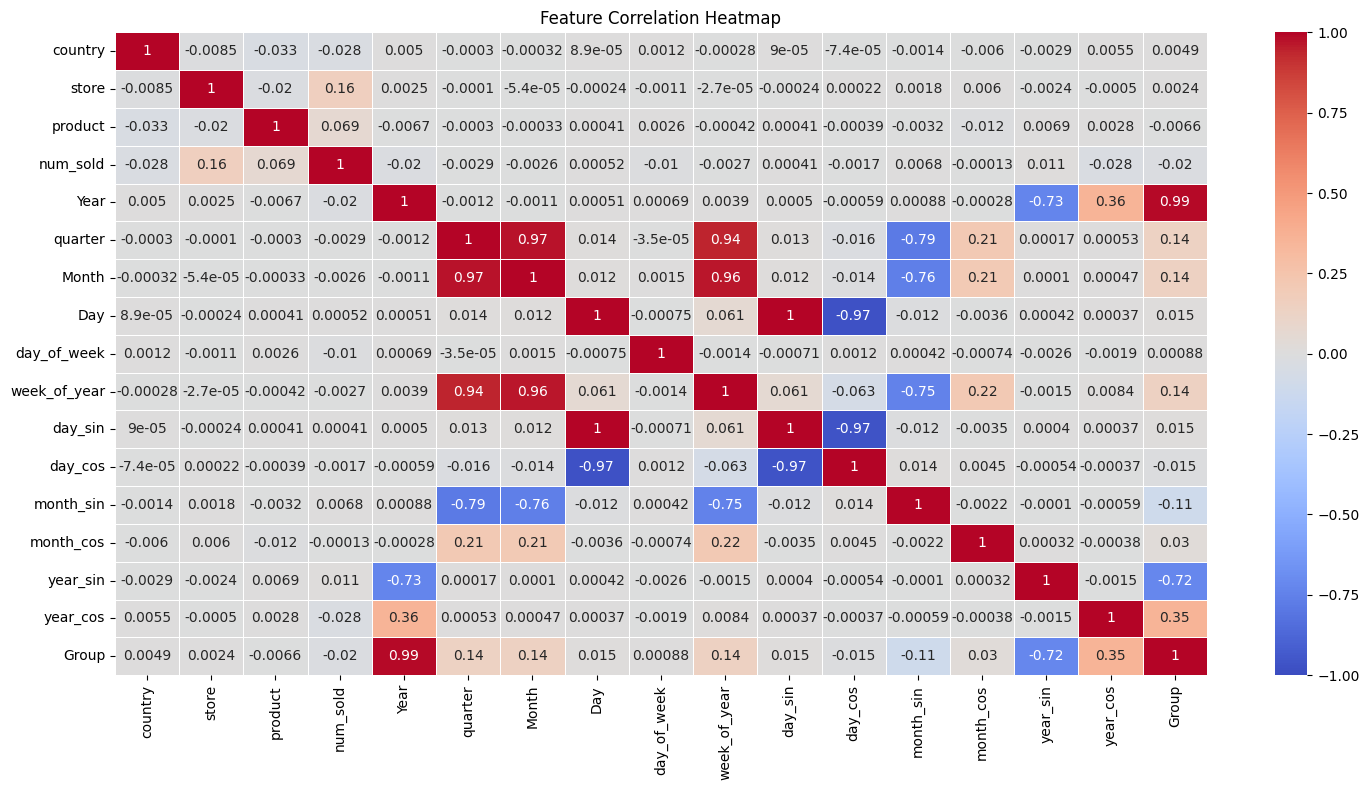

In [22]:
corr_matrix = df1.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# 3. Model Selection

In [24]:
X = df1.drop(['num_sold'], axis=1)
y = df1['num_sold']
test = test_df.drop(['id'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3.1 LinearRegression

In [86]:
LR = LinearRegression()
LR.fit(X_train, y_train)

Y_LR = LR.predict(X_test)

mse_LR1 = mean_squared_error(y_test, Y_LR)
mae_LR1 = mean_absolute_error(y_test, Y_LR)
r2_LR1 = r2_score(y_test, Y_LR)

print("MSE:", mse_LR1)
print("MAE:", mae_LR1)
print("R²:", r2_LR1)

MSE: 2.218688433276718
MAE: 1.1290401688811948
R²: 0.03426822747198943


## 3.2 Ridge

In [12]:
Ri = Ridge()
Ri.fit(X_train, y_train)

Y_Ri = Ri.predict(X_test)

mse_LR2 = mean_squared_error(y_test, Y_Ri)
mae_LR2 = mean_absolute_error(y_test, Y_Ri)
r2_LR2 = r2_score(y_test, Y_Ri)

print("MSE:", mse_LR2)
print("MAE:", mae_LR2)
print("R²:", r2_LR2)

MSE: 110564.19386221968
MAE: 235.36075041436368
R²: 0.7684528849236062


## 3.3 Lasso

In [13]:
La = Lasso()
La.fit(X_train, y_train)

Y_La = La.predict(X_test)

mse_LR3 = mean_squared_error(y_test, Y_La)
mae_LR3 = mean_absolute_error(y_test, Y_La)
r2_LR3 = r2_score(y_test, Y_La)

print("MSE:", mse_LR3)
print("MAE:", mae_LR3)
print("R²:", r2_LR3)

MSE: 110683.89648684702
MAE: 234.94774933833125
R²: 0.7682021998109008


## 3.4 ElasticNet

In [14]:
EN = ElasticNet()
EN.fit(X_train, y_train)

Y_EN = EN.predict(X_test)

mse_LR4 = mean_squared_error(y_test, Y_EN)
mae_LR4 = mean_absolute_error(y_test, Y_EN)
r2_LR4 = r2_score(y_test, Y_EN)

print("MSE:", mse_LR4)
print("MAE:", mae_LR4)
print("R²:", r2_LR4)

MSE: 300131.41860792495
MAE: 403.3350992083579
R²: 0.3714550642945794


## 3.5 SVR

In [15]:
svr = SVR()
svr.fit(X_train, y_train)

Y_dt = svr.predict(X_test)

mse_LR5 = mean_squared_error(y_test, Y_dt)
mae_LR5 = mean_absolute_error(y_test, Y_dt)
r2_LR5 = r2_score(y_test, Y_dt)

print("MSE:", mse_LR5)
print("MAE:", mae_LR5)
print("R²:", r2_LR5)

MSE: 501606.91753916093
MAE: 516.1125102396644
R²: -0.0504814497475643


## 3.6 DecisionTreeRegressor

In [16]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train)

Y_DTR = DTR.predict(X_test)

mse_LR6 = mean_squared_error(y_test, Y_DTR)
mae_LR6 = mean_absolute_error(y_test, Y_DTR)
r2_LR6 = r2_score(y_test, Y_DTR)

print("MSE:", mse_LR6)
print("MAE:", mae_LR6)
print("R²:", r2_LR6)

MSE: 12343.221917881787
MAE: 63.76547222788432
R²: 0.9741504249613143


## 3.7 RandomForestRegressor

In [17]:
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)

Y_RFR = RFR.predict(X_test)

mse_LR7 = mean_squared_error(y_test, Y_RFR)
mae_LR7 = mean_absolute_error(y_test, Y_RFR)
r2_LR7 = r2_score(y_test, Y_RFR)

print("MSE:", mse_LR7)
print("MAE:", mae_LR7)
print("R²:", r2_LR7)

MSE: 12343.537982697377
MAE: 63.76603458236331
R²: 0.9741497630481427


## 3.8 GradientBoostingRegressor

In [18]:
GBR = GradientBoostingRegressor()
GBR.fit(X_train, y_train)

Y_GBR = GBR.predict(X_test)

mse_LR8 = mean_squared_error(y_test, Y_GBR)
mae_LR8 = mean_absolute_error(y_test, Y_GBR)
r2_LR8 = r2_score(y_test, Y_GBR)

print("MSE:", mse_LR8)
print("MAE:", mae_LR8)
print("R²:", r2_LR8)

MSE: 20819.076628347284
MAE: 95.27082163864603
R²: 0.956400015561499


## 3.9 AdaBoostRegressor

In [19]:
ABR = AdaBoostRegressor()
ABR.fit(X_train, y_train)

Y_ABR = ABR.predict(X_test)

mse_LR9 = mean_squared_error(y_test, Y_ABR)
mae_LR9 = mean_absolute_error(y_test, Y_ABR)
r2_LR9 = r2_score(y_test, Y_ABR)

print("MSE:", mse_LR9)
print("MAE:", mae_LR9)
print("R²:", r2_LR9)

MSE: 184920.15877943172
MAE: 375.3839321961314
R²: 0.6127342153988505


## 3.10 BaggingRegressor

In [20]:
BR = BaggingRegressor()
BR.fit(X_train, y_train)

Y_BR = BR.predict(X_test)

mse_LR10 = mean_squared_error(y_test, Y_BR)
mae_LR10 = mean_absolute_error(y_test, Y_BR)
r2_LR10 = r2_score(y_test, Y_BR)

print("MSE:", mse_LR10)
print("MAE:", mae_LR10)
print("R²:", r2_LR10)

MSE: 12364.552182885627
MAE: 63.82288007946294
R²: 0.9741057544296265


## 3.11 MLPRegressor

In [21]:
MLPR = MLPRegressor()
MLPR.fit(X_train, y_train)

Y_MLPR = MLPR.predict(X_test)

mse_LR11 = mean_squared_error(y_test, Y_MLPR)
mae_LR11 = mean_absolute_error(y_test, Y_MLPR)
r2_LR11 = r2_score(y_test, Y_MLPR)

print("MSE:", mse_LR11)
print("MAE:", mae_LR11)
print("R²:", r2_LR11)

MSE: 40648.93360156241
MAE: 135.25198948925114
R²: 0.9148716869576903


## 3.12 LGBMRegressor

In [41]:
LGBM_model = LGBMRegressor()
LGBM_model.fit(X_train, y_train)

Y_LGBM = LGBM_model.predict(X_test)

mse_LR12 = mean_squared_error(y_test, Y_LGBM)
mae_LR12 = mean_absolute_error(y_test, Y_LGBM)
r2_LR12 = r2_score(y_test, Y_LGBM)

print("MSE:", mse_LR12)
print("MAE:", mae_LR12)
print("R²:", r2_LR12)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 490
[LightGBM] [Info] Number of data points in the train set: 177007, number of used features: 18
[LightGBM] [Info] Start training from score 5.936249
MSE: 0.004095608711802054
MAE: 0.050563073134328014
R²: 0.998217298381554


In [25]:
parameters = {
    'n_estimators': 3946, 'learning_rate': 0.10203344298643195, 'max_depth': 12, 'num_leaves': 20, 'min_child_samples': 39, 'subsample': 0.7786665459484634, 'colsample_bytree': 0.7352055562065795, 'reg_alpha': 0.2840216195298897, 'reg_lambda': 6.583320975256993, "verbosity" : -1
    }

In [27]:
# Define MAPE metric
def mape(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)*100

# Cross-validation for LGBMRegressor
def cross_val_lgbm_mape(X, y, test, n_splits=20, **parameters):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    mape_scores = []
    preds = []

    for train_index, valid_index in kf.split(X):
        # Ensure data types for indexing
        if isinstance(X, pd.DataFrame):
            X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
            y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
        else:
            X_train, X_valid = X[train_index], X[valid_index]
            y_train, y_valid = y[train_index], y[valid_index]

        # Initialize and train the model
        model = LGBMRegressor(random_state=42, **parameters)
        model.fit(X_train, y_train)

        # Predictions and evaluation
        y_pred = model.predict(X_valid)
        score = mape(y_valid, y_pred)
        mape_scores.append(score)

        # Predict on the test set
        preds.append(model.predict(test))

    # Average predictions over all folds
    test_preds_mean = np.mean(preds, axis=0)

    return np.mean(mape_scores), test_preds_mean


average_mape, lgb_preds = cross_val_lgbm_mape(X, y, test, n_splits=7, **parameters)

print(f"Average MAPE across folds: {average_mape:.4f}")

# Save predictions for submission
submission = pd.DataFrame({'id': test_df['id'], 'num_sold': np.expm1(lgb_preds).round()})
print(submission.head())
submission.to_csv('submission_lgb.csv', index=False)

Average MAPE across folds: 0.7855
       id  num_sold
0  230130     140.0
1  230131     882.0
2  230132     699.0
3  230133     390.0
4  230134     456.0


# 4. Model Comparison

In [23]:
df_model = pd.DataFrame({
    'Model' : ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet',
               'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor',
               'GradientBoostingRegressor', 'AdaBoostRegressor', 'BaggingRegressor',
               'MLPRegressor','LGBMRegressor'],
    'MSE' : [mse_LR1,mse_LR2,mse_LR3,mse_LR4,mse_LR5,mse_LR6,
             mse_LR7,mse_LR8,mse_LR9,mse_LR10,mse_LR11,mse_LR12],
    'R²' : [r2_LR1,r2_LR2,r2_LR3,r2_LR4,r2_LR5,r2_LR6,
            r2_LR7,r2_LR8,r2_LR9,r2_LR10,r2_LR11,r2_LR12]
})

In [24]:
df_model.sort_values(by = ['MSE', 'R²'], ascending=True)

Model            MSE        R²
5       DecisionTreeRegressor   12343.221918  0.974150
6       RandomForestRegressor   12343.537983  0.974150
9            BaggingRegressor   12364.552183  0.974106
11              LGBMRegressor   12530.893801  0.973757
7   GradientBoostingRegressor   20819.076628  0.956400
10               MLPRegressor   40648.933602  0.914872
1                       Ridge  110564.193862  0.768453
0            LinearRegression  110569.377879  0.768442
2                       Lasso  110683.896487  0.768202
8           AdaBoostRegressor  184920.158779  0.612734
3                  ElasticNet  300131.418608  0.371455
4                         SVR  501606.917539 -0.050481

# 5. Data Prediction

In [43]:
final_outcome = LGBM_model.predict(X_test_final)

submission = pd.DataFrame({
    'id': test_df['id'],
    'Survived': final_outcome
    })
submission.to_csv('./submission5.csv', index=False)

In [462]:
test_df1

year   quarter_sin   quarter_cos  country_Canada  country_Finland  \
0      2017  1.000000e+00  6.123234e-17            True            False   
1      2017  1.000000e+00  6.123234e-17            True            False   
2      2017  1.000000e+00  6.123234e-17            True            False   
3      2017  1.000000e+00  6.123234e-17            True            False   
4      2017  1.000000e+00  6.123234e-17            True            False   
...     ...           ...           ...             ...              ...   
98545  2019 -2.449294e-16  1.000000e+00           False            False   
98546  2019 -2.449294e-16  1.000000e+00           False            False   
98547  2019 -2.449294e-16  1.000000e+00           False            False   
98548  2019 -2.449294e-16  1.000000e+00           False            False   
98549  2019 -2.449294e-16  1.000000e+00           False            False   

       country_Italy  country_Kenya  country_Norway  country_Singapore  \
0              False          False           False              False   
1              False          False           False              False   
2              False          False           False              False   
3              False          False           False              False   
4              False          False           False              False   
...              ...            ...             ...                ...   
98545          False          False           False               True   
98546          False          False           False               True   
98547          False          False           False               True   
98548          False          False           False               True   
98549          False          False           False               True   

       store_Discount Stickers  store_Premium Sticker Mart  \
0                         True                       False   
1                         True                       False   
2                         True                       False   
3                         True                       False   
4                         True                       False   
...                        ...                         ...   
98545                    False                        True   
98546                    False                        True   
98547                    False                        True   
98548                    False                        True   
98549                    False                        True   

       store_Stickers for Less  product_Holographic Goose  product_Kaggle  \
0                        False                       True           False   
1                        False                      False            True   
2                        False                      False           False   
3                        False                      False           False   
4                        False                      False           False   
...                        ...                        ...             ...   
98545                    False                       True           False   
98546                    False                      False            True   
98547                    False                      False           False   
98548                    False                      False           False   
98549                    False                      False           False   

       product_Kaggle Tiers  product_Kerneler  product_Kerneler Dark Mode  
0                     False             False                       False  
1                     False             False                       False  
2                      True             False                       False  
3                     False              True                       False  
4                     False             False                        True  
...                     ...               ...                         ...  
985